# Initial Cleaning/ setup procedures


#### _1. Import libraries and set path to pkl file_

In [81]:
import pandas as pd
import os
from datetime import date, timedelta
import datetime
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

ROOT_DIR = os.path.realpath(os.path.join(os.getcwd(), '..'))
pkl_loc = os.path.join(ROOT_DIR, 'data', 'data','weathersmallraw.pkl')
pkl_loc

'C:\\Users\\paull\\OneDrive - Scandinavian Tobacco Group A S\\Documents\\GitHub\\Weatherman\\data\\data\\weathersmallraw.pkl'

### _2. Create dataframe and run basic eda_

In [82]:
df = pd.read_pickle(pkl_loc)
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8143419 entries, ('0CNUO', Timestamp('2021-10-15 00:00:00')) to ('ZYITU', Timestamp('2022-10-15 23:00:00'))
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   temp    float64
 1   dwpt    float64
 2   rhum    float64
 3   prcp    float64
 4   snow    float64
 5   wdir    float64
 6   wspd    float64
 7   wpgt    float64
 8   pres    float64
 9   tsun    float64
 10  coco    float64
dtypes: float64(11)
memory usage: 714.8+ MB


In [83]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,8143364.000,8143349.000,8143369.000,8108127.000,0.000,8143263.000,8143299.000,0.000,8143108.000,0.000,3232619.000
mean,10.367,4.488,70.391,0.117,NaN,176.150,12.871,NaN,1016.337,NaN,2.976
std,12.527,11.790,19.645,0.920,NaN,112.485,9.181,NaN,7.606,NaN,2.736
min,-43.000,-52.900,0.000,0.000,NaN,0.000,0.000,NaN,880.000,NaN,1.000
25%,1.400,-3.400,57.000,0.000,NaN,80.000,7.000,NaN,1012.000,NaN,1.000
50%,11.700,5.100,73.000,0.000,NaN,190.000,11.200,NaN,1016.400,NaN,3.000
75%,20.000,14.400,86.000,0.000,NaN,270.000,18.400,NaN,1021.000,NaN,3.000
max,65.000,60.000,100.000,332.000,NaN,360.000,243.000,NaN,1061.000,NaN,25.000


In [84]:
df

temp   dwpt   rhum  prcp  snow    wdir   wspd  \
station time                                                                  
0CNUO   2021-10-15 00:00:00  9.900  7.800 87.000 0.100   NaN 226.000 20.900   
        2021-10-15 01:00:00  9.800  7.700 87.000 0.100   NaN 227.000 20.200   
        2021-10-15 02:00:00  9.600  7.400 86.000 0.100   NaN 228.000 19.400   
        2021-10-15 03:00:00  9.400  7.000 85.000 0.100   NaN 231.000 18.400   
        2021-10-15 04:00:00  9.100  6.900 86.000 0.100   NaN 233.000 18.400   
...                            ...    ...    ...   ...   ...     ...    ...   
ZYITU   2022-10-15 19:00:00 11.000 -1.800 41.000 0.000   NaN 220.000 26.000   
        2022-10-15 20:00:00 11.000 -1.800 41.000 0.000   NaN 210.000 24.000   
        2022-10-15 21:00:00 10.800 -1.300 43.000 0.000   NaN 220.000 18.400   
        2022-10-15 22:00:00  9.000 -1.400 48.000 0.000   NaN 210.000 17.000   
        2022-10-15 23:00:00  8.000 -1.000 53.000 0.000   NaN 200.000 13.000   

                             wpgt     pres  tsun  coco  
station time                                            
0CNUO   2021-10-15 00:00:00   NaN 1002.800   NaN   NaN  
        2021-10-15 01:00:00   NaN 1003.500   NaN   NaN  
        2021-10-15 02:00:00   NaN 1004.000   NaN   NaN  
        2021-10-15 03:00:00   NaN 1004.400   NaN   NaN  
        2021-10-15 04:00:00   NaN 1004.800   NaN   NaN  
...                           ...      ...   ...   ...  
ZYITU   2022-10-15 19:00:00   NaN 1012.000   NaN 3.000  
        2022-10-15 20:00:00   NaN 1013.000   NaN 3.000  
        2022-10-15 21:00:00   NaN 1013.500   NaN 3.000  
        2022-10-15 22:00:00   NaN 1013.000   NaN 3.000  
        2022-10-15 23:00:00   NaN 1013.000   NaN 1.000  

[8143419 rows x 11 columns]

### _3. Remove unneeded columns_


In [85]:
df.drop(columns=['snow', 'wpgt','tsun','coco'],inplace=True)
df.head()

temp  dwpt   rhum  prcp    wdir   wspd     pres
station time                                                                
0CNUO   2021-10-15 00:00:00 9.900 7.800 87.000 0.100 226.000 20.900 1002.800
        2021-10-15 01:00:00 9.800 7.700 87.000 0.100 227.000 20.200 1003.500
        2021-10-15 02:00:00 9.600 7.400 86.000 0.100 228.000 19.400 1004.000
        2021-10-15 03:00:00 9.400 7.000 85.000 0.100 231.000 18.400 1004.400
        2021-10-15 04:00:00 9.100 6.900 86.000 0.100 233.000 18.400 1004.800

In [86]:
df=df.reset_index()

### _4. Counting Stations_

In [87]:
df.groupby("station").count() #clearly some stations are missing

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
station,,,,,,,,
0CNUO,8776,8776,8776,8776,8774,8776,8776,8776
0CO7B,8776,8776,8776,8776,8774,8776,8776,8776
0FV1F,8776,8776,8776,8776,8774,8776,8776,8776
0NNEW,3888,3888,3888,3888,3872,3888,3888,3875
1CZCV,4210,4210,4210,4210,4173,4210,4210,4210
...,...,...,...,...,...,...,...,...
ZFZUV,8784,8784,8784,8784,8782,8784,8784,8784
ZNWZW,4210,4210,4210,4210,4190,4210,4210,4210
ZUQJS,3894,3894,3894,3894,3881,3894,3894,3883


In [124]:
dfstations=df.groupby("station").count()
df_stationskeep = dfstations[dfstations['time']>6000].reset_index() #creating this to know which stations to keep later
df_stationskeep 

,station,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,0CNUO,8784,8776,8776,8776,8774,8776,8776,8776
1,0CO7B,8784,8776,8776,8776,8774,8776,8776,8776
2,0FV1F,8784,8776,8776,8776,8774,8776,8776,8776
3,1J1PJ,8784,8784,8784,8784,8784,8784,8784,8784
4,1JWST,8784,8784,8784,8784,8784,8783,8784,8784
...,...,...,...,...,...,...,...,...,...
892,V5792,8784,8784,8784,8784,8784,8784,8784,8784
893,VMWBN,8784,8784,8784,8784,8784,8784,8784,8784
894,XM44W,8784,8784,8784,8784,8777,8784,8784,8784
895,ZFZUV,8784,8784,8784,8784,8782,8784,8784,8784


### _5. Difference in Time_

In [89]:
dftime=df.set_index('station')

In [90]:
dftime['timediff']=dftime['time'].diff(periods=1) #difference for hours

In [91]:
dftime['timediff']=dftime['timediff']/pd.Timedelta(hours=1) #converted to hour int

In [92]:

#This is fantiastic, it looks like we are missing only data 253 times, and none of it more than 7 hours.  Seems like an idea situation.
dftime[dftime['timediff']>1]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
station,,,,,,,,,
0CNUO,2022-05-26 12:00:00,7.200,5.800,91.000,NaN,45.000,8.600,1012.500,6.000
0CNUO,2022-05-26 16:00:00,14.100,4.400,52.000,NaN,78.000,10.400,1013.100,4.000
0CO7B,2022-05-26 12:00:00,19.200,17.000,87.000,NaN,172.000,26.600,1011.500,6.000
0CO7B,2022-05-26 16:00:00,22.200,18.200,78.000,NaN,202.000,26.600,1013.400,4.000
0FV1F,2022-05-26 12:00:00,16.700,13.400,81.000,NaN,168.000,14.800,1015.000,6.000
...,...,...,...,...,...,...,...,...,...
ZUQJS,2022-05-06 19:00:00,12.800,2.600,50.000,NaN,20.000,13.000,NaN,2.000
ZUQJS,2022-05-06 21:00:00,15.000,0.800,38.000,NaN,60.000,16.600,NaN,2.000
ZUQJS,2022-05-07 01:00:00,10.200,-0.600,47.000,NaN,70.000,7.600,NaN,4.000


In [93]:
#Looking at the data above in more detail for a specific location.
test=dftime.loc['0CNUO']

In [94]:

test[(test['time']>='2022-05-25 01:00:00') & (test['time']<'2022-05-27 01:00:00')] 
#we seem to have a couple issues, first there are missing values here, and one missing prcp goes to naan

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
station,,,,,,,,,
0CNUO,2022-05-25 01:00:00,15.100,7.600,61.000,0.000,217.000,8.600,1019.500,1.000
0CNUO,2022-05-25 02:00:00,12.500,6.800,68.000,0.000,217.000,10.400,1020.100,1.000
0CNUO,2022-05-25 03:00:00,10.900,6.200,73.000,0.000,223.000,9.400,1020.600,1.000
0CNUO,2022-05-25 04:00:00,9.900,6.100,77.000,0.000,223.000,9.400,1020.900,1.000
0CNUO,2022-05-25 05:00:00,9.300,5.500,77.000,0.000,224.000,9.400,1021.200,1.000
0CNUO,2022-05-25 06:00:00,8.700,5.100,78.000,0.000,218.000,9.000,1021.600,1.000
0CNUO,2022-05-25 07:00:00,7.900,5.000,82.000,0.000,222.000,6.800,1021.600,1.000
0CNUO,2022-05-25 08:00:00,7.200,4.800,85.000,0.000,217.000,7.600,1021.600,1.000
0CNUO,2022-05-25 09:00:00,6.800,4.800,87.000,0.000,206.000,6.500,1021.500,1.000


### _6. Null and Precep Count_

In [95]:
dftime.isnull().sum()

#lot of null for prcp


time            0
temp           55
dwpt           70
rhum           50
prcp        35292
wdir          156
wspd          120
pres          311
timediff        1
dtype: int64

In [96]:
dftime[dftime["prcp"]>0]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
station,,,,,,,,,
0CNUO,2021-10-15 00:00:00,9.900,7.800,87.000,0.100,226.000,20.900,1002.800,NaN
0CNUO,2021-10-15 01:00:00,9.800,7.700,87.000,0.100,227.000,20.200,1003.500,1.000
0CNUO,2021-10-15 02:00:00,9.600,7.400,86.000,0.100,228.000,19.400,1004.000,1.000
0CNUO,2021-10-15 03:00:00,9.400,7.000,85.000,0.100,231.000,18.400,1004.400,1.000
0CNUO,2021-10-15 04:00:00,9.100,6.900,86.000,0.100,233.000,18.400,1004.800,1.000
...,...,...,...,...,...,...,...,...,...
ZYITU,2022-10-15 07:00:00,12.400,1.100,46.000,0.400,190.000,25.900,1003.200,1.000
ZYITU,2022-10-15 08:00:00,10.000,5.400,73.000,0.300,210.000,32.000,1003.000,1.000
ZYITU,2022-10-15 09:00:00,8.500,4.500,76.000,0.300,240.000,20.500,1004.300,1.000


In [97]:
dftest=dftime.loc['KARB0']

In [98]:
dftest[dftest["prcp"]>0]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
station,,,,,,,,,
KARB0,2021-10-15 05:00:00,15.600,15.000,96.000,0.100,0.000,0.000,1012.400,1.000
KARB0,2021-10-15 06:00:00,15.600,15.000,96.000,0.400,0.000,0.000,1012.600,1.000
KARB0,2021-10-15 07:00:00,16.100,15.600,97.000,1.000,260.000,5.400,1013.200,1.000
KARB0,2021-10-15 08:00:00,15.600,14.500,93.000,0.200,210.000,7.600,1013.300,1.000
KARB0,2021-10-15 09:00:00,15.600,14.500,93.000,0.100,90.000,5.400,1011.800,1.000
...,...,...,...,...,...,...,...,...,...
KARB0,2022-10-13 11:00:00,8.300,6.100,86.000,0.300,250.000,18.400,1003.000,1.000
KARB0,2022-10-15 05:00:00,8.300,1.200,61.000,0.200,210.000,11.200,1004.800,1.000
KARB0,2022-10-15 06:00:00,7.800,4.400,79.000,1.100,210.000,14.800,1004.300,1.000


In [99]:
dftime

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
station,,,,,,,,,
0CNUO,2021-10-15 00:00:00,9.900,7.800,87.000,0.100,226.000,20.900,1002.800,NaN
0CNUO,2021-10-15 01:00:00,9.800,7.700,87.000,0.100,227.000,20.200,1003.500,1.000
0CNUO,2021-10-15 02:00:00,9.600,7.400,86.000,0.100,228.000,19.400,1004.000,1.000
0CNUO,2021-10-15 03:00:00,9.400,7.000,85.000,0.100,231.000,18.400,1004.400,1.000
0CNUO,2021-10-15 04:00:00,9.100,6.900,86.000,0.100,233.000,18.400,1004.800,1.000
...,...,...,...,...,...,...,...,...,...
ZYITU,2022-10-15 19:00:00,11.000,-1.800,41.000,0.000,220.000,26.000,1012.000,1.000
ZYITU,2022-10-15 20:00:00,11.000,-1.800,41.000,0.000,210.000,24.000,1013.000,1.000
ZYITU,2022-10-15 21:00:00,10.800,-1.300,43.000,0.000,220.000,18.400,1013.500,1.000


In [100]:
#cln_pkl_loc = os.path.join(ROOT_DIR, 'data_cleaning','cleanweathersmall.pkl')
#df.to_pickle(cln_pkl_loc)


### _6. Merging in new time_

In [102]:
time_range = pd.date_range('2021-10-15 00:00:00', '2022-10-15 23:00:00', freq='H') ##creating time range

In [103]:
df_time=pd.DataFrame(time_range)

In [104]:
df_time.columns =['time']

In [105]:
df_station = pd.DataFrame(df.station.unique())
df_station.columns=['station']


In [106]:
#merging to limit to the 575 stations which have data back to Jan.
df_station=df_station.merge(df_stationskeep.station, left_on='station',right_on='station') 

In [107]:
df_time_station=df_station.merge(df_time, how='cross')

In [108]:
df_time_station

,station,time
0,0CNUO,2021-10-15 00:00:00
1,0CNUO,2021-10-15 01:00:00
2,0CNUO,2021-10-15 02:00:00
3,0CNUO,2021-10-15 03:00:00
4,0CNUO,2021-10-15 04:00:00
...,...,...
7879243,ZWC6W,2022-10-15 19:00:00
7879244,ZWC6W,2022-10-15 20:00:00
7879245,ZWC6W,2022-10-15 21:00:00
7879246,ZWC6W,2022-10-15 22:00:00


In [109]:
df=df_time_station.merge(df,left_on=['station', 'time'], right_on=['station','time'], how='left') #new df with nulls 

In [110]:
df

,station,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,0CNUO,2021-10-15 00:00:00,9.900,7.800,87.000,0.100,226.000,20.900,1002.800
1,0CNUO,2021-10-15 01:00:00,9.800,7.700,87.000,0.100,227.000,20.200,1003.500
2,0CNUO,2021-10-15 02:00:00,9.600,7.400,86.000,0.100,228.000,19.400,1004.000
3,0CNUO,2021-10-15 03:00:00,9.400,7.000,85.000,0.100,231.000,18.400,1004.400
4,0CNUO,2021-10-15 04:00:00,9.100,6.900,86.000,0.100,233.000,18.400,1004.800
...,...,...,...,...,...,...,...,...,...
7879243,ZWC6W,2022-10-15 19:00:00,6.900,5.200,89.000,1.200,100.000,16.000,1001.100
7879244,ZWC6W,2022-10-15 20:00:00,6.600,5.200,91.000,1.400,70.000,13.000,1001.100
7879245,ZWC6W,2022-10-15 21:00:00,6.100,5.200,94.000,1.200,60.000,4.000,1001.300
7879246,ZWC6W,2022-10-15 22:00:00,6.000,5.400,96.000,1.000,50.000,7.000,1001.400


### _7. Inputting missing values_

In [111]:
#dfinputt=df.drop(['station', 'time'], axis=1)
#dfinputt

In [112]:
#imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
#imputer.fit_transform(dfinputt)  I have decided KNN just isn't the best approach.  Its slow and this is time series data, it doesn't need to scan the entire dataframe looking for neighbors, we know what the "neighbors" are

In [113]:
df.isnull().sum()

station        0
time           0
temp         645
dwpt         660
rhum         640
prcp       34693
wdir         688
wspd         677
pres         656
dtype: int64

In [114]:
dfint=df.copy(deep=True)
#dfint=dfint.set_index('station')
for column in dfint:
    if column in ['station', 'time']:
        None
    else:
        #print(column)
#         dfint[column]=dfint[column].interpolate(method='polynomial', order=5)
        dfint[column]=dfint[column].interpolate(method ='linear', limit_direction ='forward')


In [115]:
dfint.isnull().sum()

station    0
time       0
temp       0
dwpt       0
rhum       0
prcp       0
wdir       0
wspd       0
pres       0
dtype: int64

In [116]:
cln_pkl_loc = os.path.join(ROOT_DIR, 'data','cleanweathersmall.pkl')
dfint.to_pickle(cln_pkl_loc)


In [122]:
len(dfint.station.unique())

897

In [118]:
test2=dfint[dfint['station']=='0CNUO']
test=df[df['station']=='0CNUO']

test2[(test2['time']>='2022-05-25 01:00:00') & (test2['time']<'2022-05-27 01:00:00')] 

,station,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
5329,0CNUO,2022-05-25 01:00:00,15.100,7.600,61.000,0.000,217.000,8.600,1019.500
5330,0CNUO,2022-05-25 02:00:00,12.500,6.800,68.000,0.000,217.000,10.400,1020.100
5331,0CNUO,2022-05-25 03:00:00,10.900,6.200,73.000,0.000,223.000,9.400,1020.600
5332,0CNUO,2022-05-25 04:00:00,9.900,6.100,77.000,0.000,223.000,9.400,1020.900
5333,0CNUO,2022-05-25 05:00:00,9.300,5.500,77.000,0.000,224.000,9.400,1021.200
5334,0CNUO,2022-05-25 06:00:00,8.700,5.100,78.000,0.000,218.000,9.000,1021.600
5335,0CNUO,2022-05-25 07:00:00,7.900,5.000,82.000,0.000,222.000,6.800,1021.600
5336,0CNUO,2022-05-25 08:00:00,7.200,4.800,85.000,0.000,217.000,7.600,1021.600
5337,0CNUO,2022-05-25 09:00:00,6.800,4.800,87.000,0.000,206.000,6.500,1021.500
5338,0CNUO,2022-05-25 10:00:00,7.200,4.500,83.000,0.000,203.000,4.700,1021.300


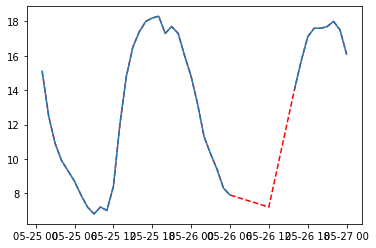

In [119]:
test3=test2[(test2['time']>='2022-05-25 01:00:00') & (test2['time']<'2022-05-27 01:00:00')] 
test4=test[(test['time']>='2022-05-25 01:00:00') & (test['time']<'2022-05-27 01:00:00')] 
x=test3['time']
y=test3['temp']
y2=test4['temp']

plt.plot(x,y, 'r--',x,y2)
#plt.plot(x,y2)
plt.show()

In [68]:
#testing spline, actually I don't like it - the numbers are too smooth.  

#test2=dfint2[dfint2['station']=='0CNUO']
#for column in test2:
#    if column in ['station', 'time']:
#        None
#    else:
        #print(column)
#        test2[column]=test2[column].interpolate(method='spline', order=3)

In [69]:
#test2[(test2['time']>='2022-05-25 01:00:00') & (test2['time']<'2022-05-27 01:00:00')] 

In [70]:
dfint.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,pres
count,3657000.000,3657000.000,3657000.000,3657000.000,3657000.000,3657000.000,3657000.000
mean,8.963,3.375,71.110,0.118,183.745,13.750,1015.760
std,13.881,13.158,18.683,1.066,112.144,9.399,7.998
min,-43.000,-52.900,0.000,0.000,0.000,0.000,970.300
25%,-1.000,-6.000,58.000,0.000,90.000,7.600,1011.000
50%,12.000,5.900,73.000,0.000,190.000,13.000,1015.900
75%,20.000,14.600,86.000,0.000,280.000,18.400,1020.400
max,60.000,60.000,100.000,332.000,360.000,189.000,1058.700


In [52]:
dfint.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,pres
count,3657000.000,3657000.000,3657000.000,3657000.000,3657000.000,3657000.000,3657000.000
mean,8.963,3.375,71.110,0.091,183.745,13.750,1015.760
std,13.881,13.159,18.683,4.842,112.146,9.399,7.998
min,-43.000,-52.900,-40.898,-633.020,-78.624,-3.353,970.300
25%,-1.000,-6.000,58.000,0.000,90.000,7.600,1011.000
50%,12.000,5.900,73.000,0.000,190.000,13.000,1015.900
75%,20.000,14.600,86.000,0.000,280.000,18.400,1020.400
max,60.000,60.000,106.841,332.000,575.808,189.000,1058.700
